# Part 2 - CNN (Pickle)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

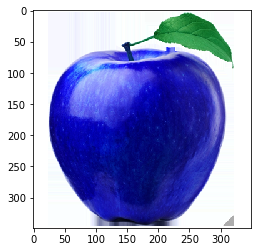

In [2]:
#Load dataset
DATADIR = r'C:\Users\Katherine\Desktop\NUS ISS\NUS ISS Term 2\Python Machine Learning\ML CA\Part2\train'
CATEGORIES = ['apple', 'banana', 'orange', 'mixed']

#Check 1 image
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to apple / banana / orange / mixed directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [3]:
#See dimensions of image

print(img_array.shape)

(349, 349, 3)


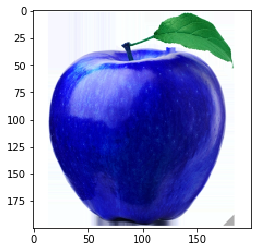

In [4]:
#Decide on size of images that you want to resize all images to & check resized image

IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [5]:
#Create training_data list to contain all resized images with the same selected size above

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to apple / banana / orange / mixed directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()

In [6]:
#Check length of training_data set

print(len(training_data))

240


In [7]:
#Shuffle training_data

import random
random.shuffle(training_data)

In [8]:
#Check category labels (y values) are correct; i.e. 0 / 1 / 2 / 3
for sample in training_data:
    print(sample[1])

2
1
2
2
2
1
2
2
2
0
2
0
2
2
1
0
3
2
1
0
2
2
1
2
1
1
3
1
0
2
3
2
1
1
2
0
2
2
1
1
2
1
1
0
3
1
2
3
0
1
0
2
2
2
0
0
3
1
0
1
0
2
0
2
1
0
1
1
2
1
0
1
1
1
1
2
1
0
2
0
1
0
1
0
3
2
0
1
2
0
0
2
0
1
0
0
1
2
0
2
3
3
1
2
0
0
2
2
1
1
0
0
1
2
2
1
1
1
3
1
0
0
2
0
2
0
3
1
0
1
1
0
2
0
2
2
2
0
2
1
3
0
0
2
0
1
3
0
1
0
0
0
0
1
2
0
0
1
0
2
0
0
0
1
0
2
1
1
2
3
2
1
2
1
0
0
3
0
0
1
0
1
0
2
0
2
1
1
0
0
1
0
2
3
0
1
3
2
0
2
1
2
1
2
1
0
0
2
2
2
0
1
1
2
2
1
0
3
1
1
2
1
1
2
2
3
0
2
1
0
2
0
1
1
0
2
3
2
1
0


In [9]:
#Create X and y lists to store data that we want to use

X = [] #feature set
y = [] #label

In [10]:
#Put respective data into X / y lists created above

for features, label in training_data:
    X.append(features)
    y.append(label)

#We cannot pass a list directly to Neural Network; need to convert X before using Neural Network.
#y can stay as a list since we are not passing it to Neural Network
#Convert X to numpy array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [11]:
#save X and y data using pickle (can also use numpy.save etc(*not sure; read up!*))

import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten

#read file - start the unpickling process
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

#normalize data
X = X/255.0

In [13]:
print(X)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1. 


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



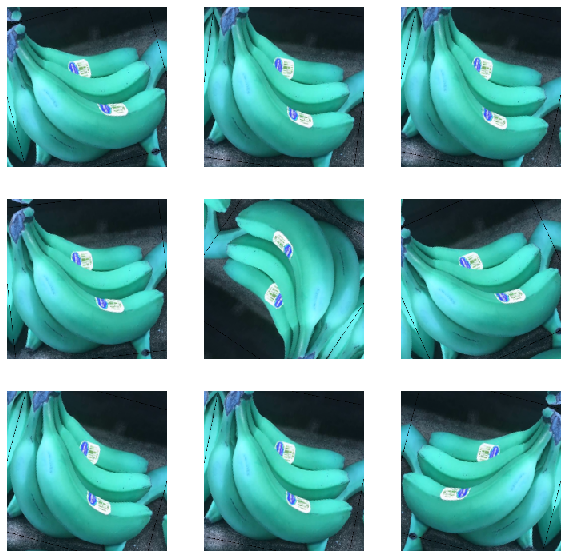

In [14]:
#Trying Image Augmentation

from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
])

plt.figure(figsize=(10,10))
for i in range(9):
    augmented_image = data_augmentation(X)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[1])
    plt.axis("off")

In [15]:
#build CNN model
model = Sequential()

#model.add(data_augmentation)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(4, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#NOTE...
#loss="categorical_crossentropy" works on one-hot encoded target 
#loss="sparse_categorical_crossentropy" takes in integer target

In [16]:
#train CNN model (need to convert X and y, which are lists into numpy arrays before you can fit to CNN model)

X = data_augmentation(np.array(X))
y = np.array(y)

history = model.fit(x=X, y=y, batch_size=64, epochs=30) #"history ="" is written so we can plot the accuracy / loss graph below

Epoch 1/30
4/4 [==============================] - 2s 594ms/step - loss: 7.9365 - accuracy: 0.4042
Epoch 2/30
4/4 [==============================] - 2s 538ms/step - loss: 2.4465 - accuracy: 0.3208
Epoch 3/30
4/4 [==============================] - 2s 529ms/step - loss: 1.0910 - accuracy: 0.5750
Epoch 4/30
4/4 [==============================] - 2s 539ms/step - loss: 0.8403 - accuracy: 0.7625
Epoch 5/30
4/4 [==============================] - 2s 537ms/step - loss: 0.6043 - accuracy: 0.7750
Epoch 6/30
4/4 [==============================] - 2s 522ms/step - loss: 0.4569 - accuracy: 0.8083
Epoch 7/30
4/4 [==============================] - 2s 545ms/step - loss: 0.3421 - accuracy: 0.8750
Epoch 8/30
4/4 [==============================] - 2s 546ms/step - loss: 0.1826 - accuracy: 0.9542
Epoch 9/30
4/4 [==============================] - 2s 533ms/step - loss: 0.1183 - accuracy: 0.9792
Epoch 10/30
4/4 [==============================] - 2s 540ms/step - loss: 0.0810 - accuracy: 0.9792
Epoch 11/30
4/4 [==

In [17]:
#evaluate accuracy of CNN model
loss, accuracy = model.evaluate(x=X, y=y)
print("loss = ", loss, "accuracy = ", accuracy)

8/8 [==============================] - 1s 92ms/step - loss: 4.9388e-04 - accuracy: 1.0000
loss =  0.0004938752972520888 accuracy =  1.0


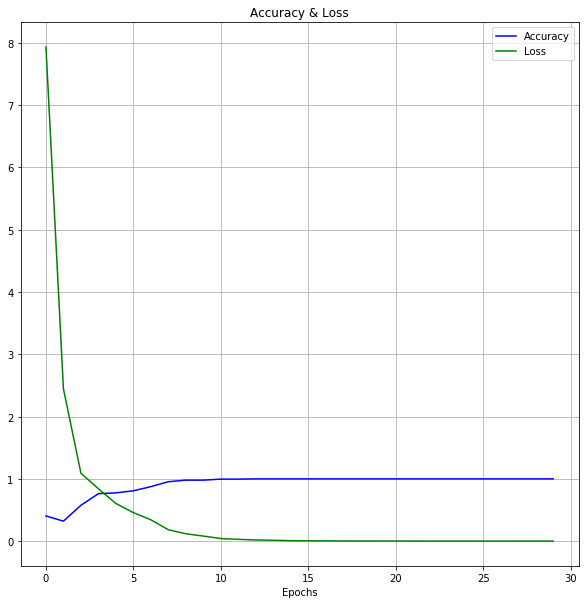

In [18]:
#plot accuracy and loss graph
fig, ax = plt.subplots(figsize=(10,10))

plt.plot(history.history['accuracy'], c='blue', label='Accuracy')
plt.plot(history.history['loss'], c='green', label='Loss')
ax.set(Title='Accuracy & Loss', xlabel='Epochs')
ax.grid()
ax.legend(loc='upper right')
plt.show()

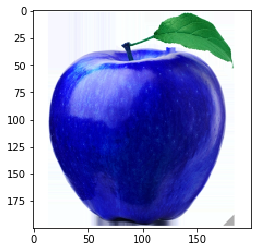

8/8 [==============================] - 1s 90ms/step - loss: 1.3863 - accuracy: 0.2667
loss =  1.3862749338150024 accuracy =  0.2666666805744171


In [19]:
#import test_data x_test, y_test to test model

#Load dataset

DATADIR = r'C:\Users\Katherine\Desktop\NUS ISS\NUS ISS Term 2\Python Machine Learning\ML CA\Part2\test'
CATEGORIES = ['apple', 'banana', 'orange', 'mixed']

#Resize all images & check a resized image

IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

#Create test_data list to contain all resized images with the same selected size above

test_data = []

def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to apple / banana / orange / mixed directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                test_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_test_data()

#Create X and y lists to store data that we want to use

X_test = [] #feature set
y_test = [] #label

#Put respective data into X / y lists created above

for features, label in training_data:
    X_test.append(features)
    y_test.append(label)

#We cannot pass a list directly to Neural Network; need to convert X before using Neural Network.
#y can stay as a list since we are not passing it to Neural Network
#Convert X to numpy array
X_test = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

#save X and y data using pickle (can also use numpy.save etc(?))

import pickle

pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

#read file - start the unpickling process
X_test = pickle.load(open("X_test.pickle", "rb"))
y_test = pickle.load(open("y_test.pickle", "rb"))

#normalize data
X_test = X_test/255.0

#build CNN model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(4, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

X_test = np.array(X_test)
y_test = np.array(y_test)

#evaluate accuracy of CNN model
loss, accuracy = model.evaluate(x=X_test, y=y_test)
print("loss = ", loss, "accuracy = ", accuracy)

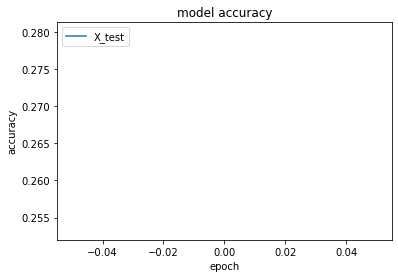

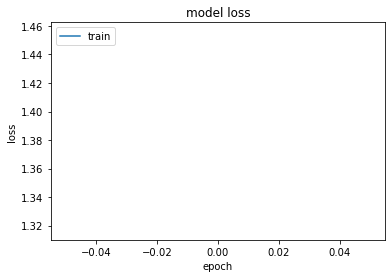

In [20]:
#print(history.history.keys())
#  "Accuracy"
plt.plot(accuracy)
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['X_test', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(loss)
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()